## Setup

In [5]:
import sys
sys.path.append('..')

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from src import utils

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
config = utils.load_config('../config/config.yaml')

DATA_DIR = os.path.join('..', config['data']['raw_dir'])
print(DATA_DIR)

[INFO] Configuration loaded from ../config/config.yaml
..\quickdraw_images_dedup


## 1. Dataset Overview

In [7]:
# Count images per class
class_counts, total_images = utils.count_images(DATA_DIR)

print(f"Total classes: {len(class_counts)}")
print(f"Total images: {total_images:,}")
print(f"\nClass names:")
for i, name in enumerate(sorted(class_counts.keys()), 1):
    print(f"{i:2d}. {name:20s} - {class_counts[name]:,} images")

Total classes: 26
Total images: 130,000

Class names:
 1. angel                - 5,000 images
 2. apple                - 5,000 images
 3. bat                  - 5,000 images
 4. book                 - 5,000 images
 5. candle               - 5,000 images
 6. castle               - 5,000 images
 7. cat                  - 5,000 images
 8. cup                  - 5,000 images
 9. dog                  - 5,000 images
10. door                 - 5,000 images
11. fish                 - 5,000 images
12. flamingo             - 5,000 images
13. hexagon              - 5,000 images
14. lantern              - 5,000 images
15. light bulb           - 5,000 images
16. mailbox              - 5,000 images
17. necklace             - 5,000 images
18. octopus              - 5,000 images
19. parachute            - 5,000 images
20. pencil               - 5,000 images
21. pig                  - 5,000 images
22. skull                - 5,000 images
23. swan                 - 5,000 images
24. sword                -

## 2. Class Distribution

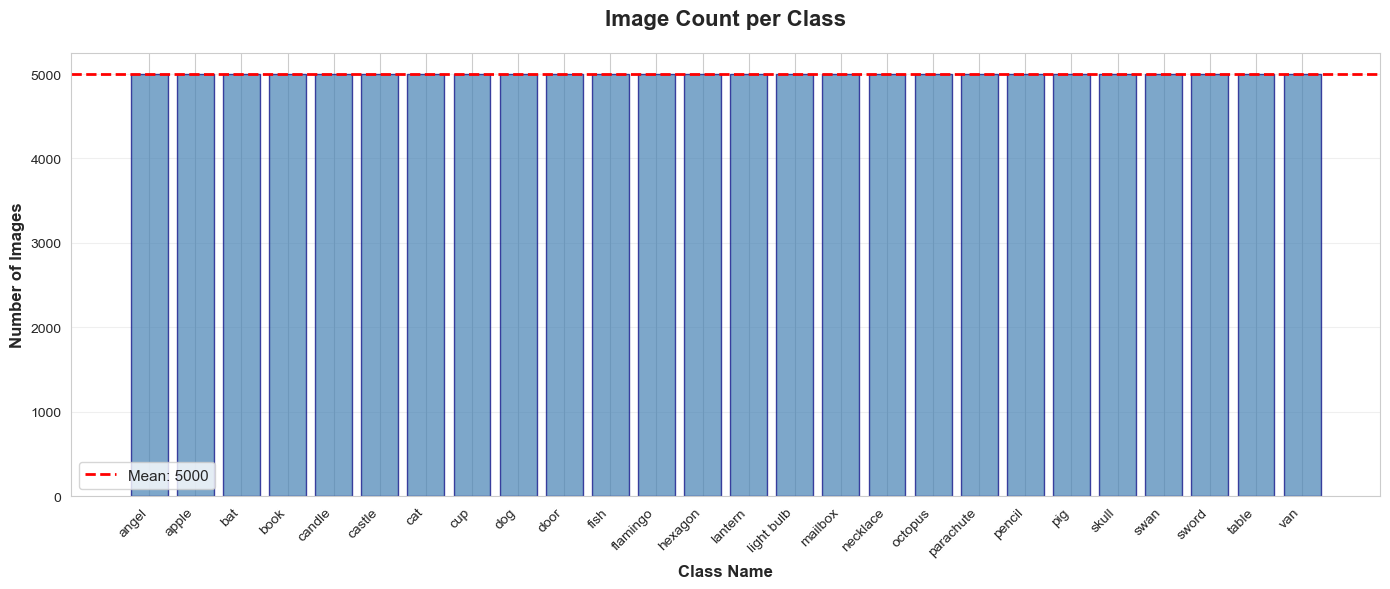


Statistics:
Mean: 5000.0
Median: 5000.0
Min: 5,000
Max: 5,000
Std: 0.0


In [8]:
# Plot class distribution
fig, ax = plt.subplots(figsize=(14, 6))

classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]

bars = ax.bar(classes, counts, color='steelblue', edgecolor='navy', alpha=0.7)
ax.set_xlabel('Class Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Image Count per Class', fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=np.mean(counts), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(counts):.0f}')
plt.xticks(rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nStatistics:")
print(f"Mean: {np.mean(counts):.1f}")
print(f"Median: {np.median(counts):.1f}")
print(f"Min: {min(counts):,}")
print(f"Max: {max(counts):,}")
print(f"Std: {np.std(counts):.1f}")

## 3. Sample Images from Each Class

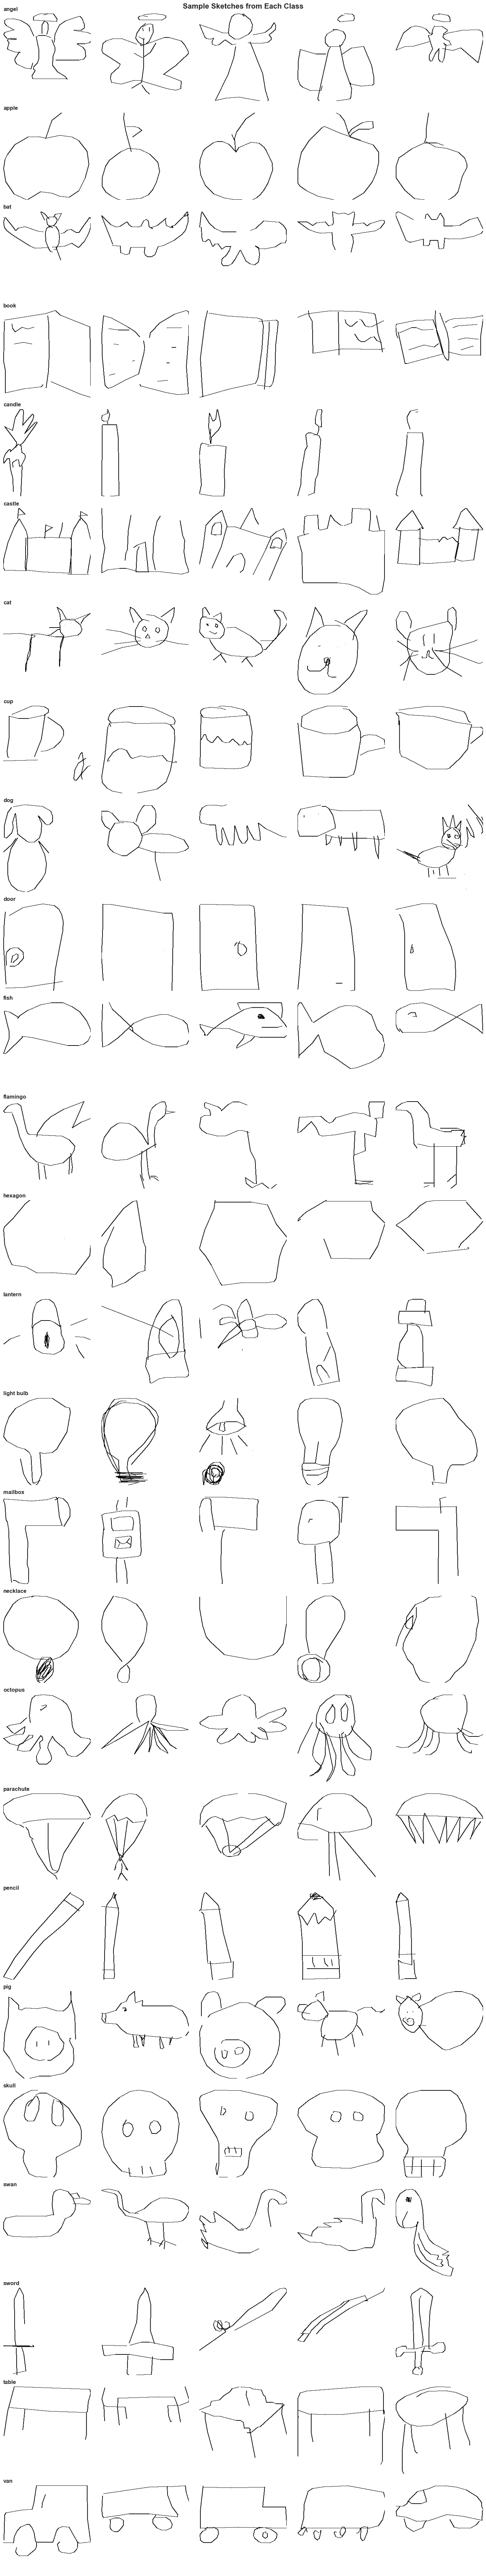

In [9]:
# Display sample images
num_samples = 5
classes = sorted(class_counts.keys())

fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 3*len(classes)))

for i, cls in enumerate(classes):
    class_dir = os.path.join(DATA_DIR, cls)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Sample random images
    samples = np.random.choice(images, min(num_samples, len(images)), replace=False)
    
    for j, img_name in enumerate(samples):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        
        ax = axes[i, j] if len(classes) > 1 else axes[j]
        ax.imshow(img)
        ax.axis('off')
        
        if j == 0:
            ax.set_title(f"{cls}", fontsize=12, fontweight='bold', loc='left')

plt.suptitle('Sample Sketches from Each Class', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 4. Image Properties Analysis

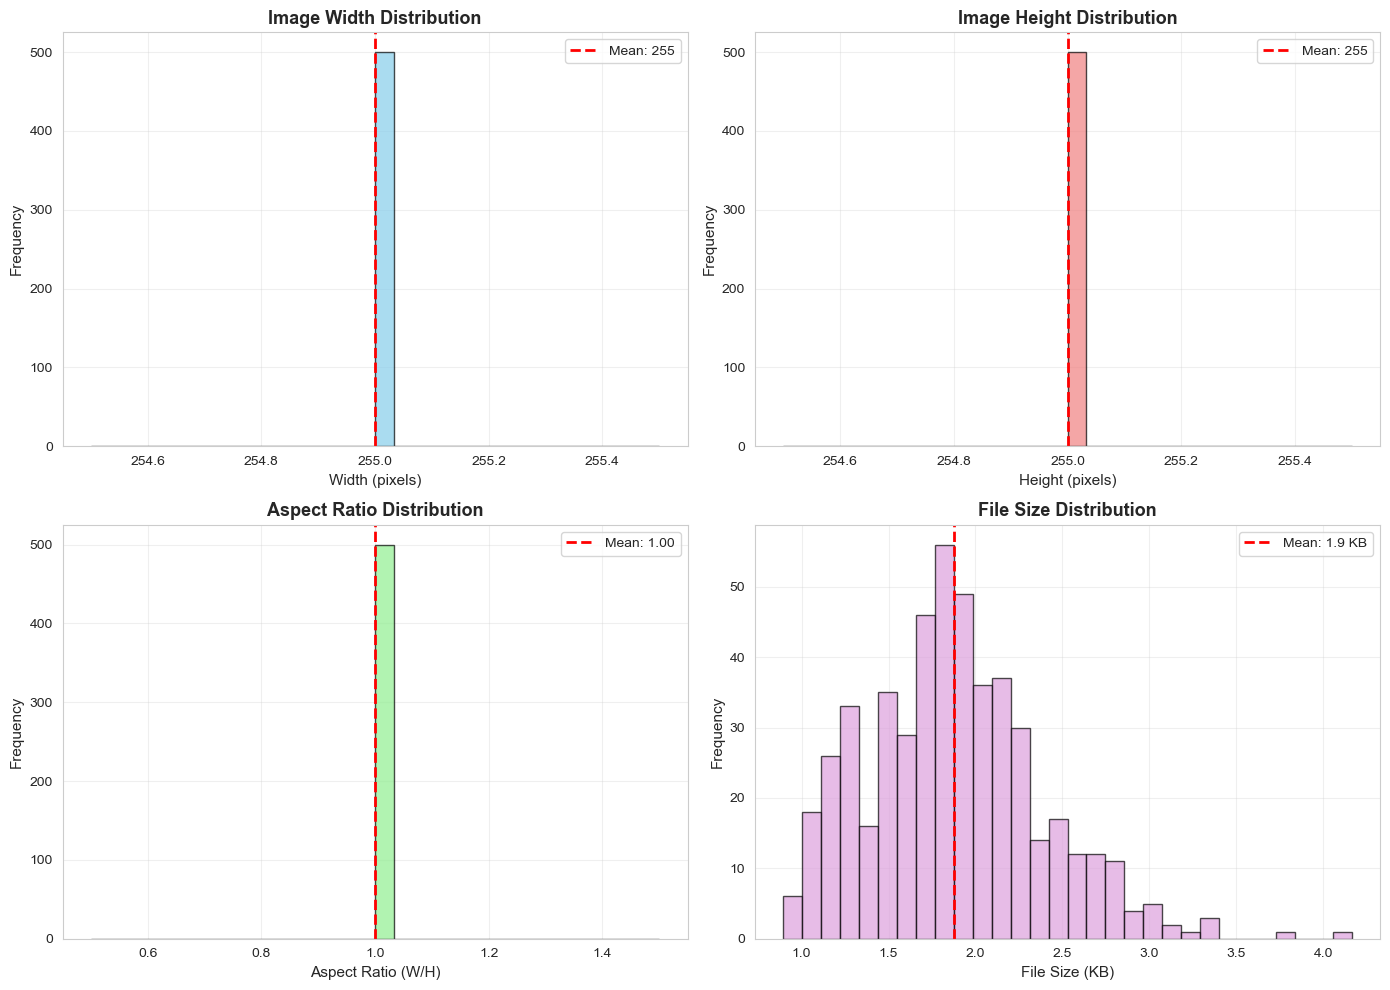


Image Properties Summary:
Width: 255 ± 0 pixels
Height: 255 ± 0 pixels
Aspect Ratio: 1.00 ± 0.00
File Size: 1.9 ± 0.5 KB


In [10]:
sample_size = 100
widths = []
heights = []
aspect_ratios = []
file_sizes = []

for cls in list(class_counts.keys())[:5]:  
    class_dir = os.path.join(DATA_DIR, cls)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    samples = np.random.choice(images, min(sample_size, len(images)), replace=False)
    
    for img_name in samples:
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w/h)
            file_sizes.append(os.path.getsize(img_path) / 1024) 
        except Exception as e:
            continue

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Width distribution
axes[0, 0].hist(widths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Width (pixels)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Image Width Distribution', fontsize=13, fontweight='bold')
axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(widths):.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Height distribution
axes[0, 1].hist(heights, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Height (pixels)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Image Height Distribution', fontsize=13, fontweight='bold')
axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(heights):.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Aspect ratio distribution
axes[1, 0].hist(aspect_ratios, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Aspect Ratio (W/H)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Aspect Ratio Distribution', fontsize=13, fontweight='bold')
axes[1, 0].axvline(np.mean(aspect_ratios), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(aspect_ratios):.2f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].hist(file_sizes, bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('File Size (KB)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('File Size Distribution', fontsize=13, fontweight='bold')
axes[1, 1].axvline(np.mean(file_sizes), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(file_sizes):.1f} KB')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nImage Properties Summary:")
print(f"Width: {np.mean(widths):.0f} ± {np.std(widths):.0f} pixels")
print(f"Height: {np.mean(heights):.0f} ± {np.std(heights):.0f} pixels")
print(f"Aspect Ratio: {np.mean(aspect_ratios):.2f} ± {np.std(aspect_ratios):.2f}")
print(f"File Size: {np.mean(file_sizes):.1f} ± {np.std(file_sizes):.1f} KB")

## 5. Summary and Insights

In [11]:
print("\n" + "="*70)
print("DATASET SUMMARY")
print("="*70)
print(f"\nDataset Overview:")
print(f"Total classes: {len(class_counts)}")
print(f"Total images: {total_images:,}")
print(f"Average per class: {total_images/len(class_counts):.0f}")
print(f"\nImage Properties:")
if widths:
    print(f"Typical size: {np.mean(widths):.0f} x {np.mean(heights):.0f} pixels")
    print(f"Average file size: {np.mean(file_sizes):.1f} KB")
print(f"\nClass Balance:")
imbalance_ratio = max(counts) / min(counts)
print(f"Min/Max ratio: 1:{imbalance_ratio:.2f}")
if imbalance_ratio < 1.5:
    print(f"Dataset well balanced")
else:
    print(f"Consider using class weights")



DATASET SUMMARY

Dataset Overview:
Total classes: 26
Total images: 130,000
Average per class: 5000

Image Properties:
Typical size: 255 x 255 pixels
Average file size: 1.9 KB

Class Balance:
Min/Max ratio: 1:1.00
Dataset well balanced
